In [5]:
import sys
import os

# Add the `src/` folder to the Python path
sys.path.append("..")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from src.config import ASSETS, RAW_DATA_PATH, PROCESSED_DATA_PATH, START_DATE, END_DATE
from src.data_loader import fetch_and_save_all 
from src.preprocessing import preprocess_data
from src.forecast import generate_forecasts
from src.arima_model import train_arima, evaluate_arima
from src.lstm_model import train_lstm
from src.optimization import optimize_portfolio
from src.backtest import simulate_portfolio
from src.eda import plot_closing_prices, plot_returns_distribution, plot_rolling_volatility, run_eda, load_processed_data


In [7]:

sns.set(style="whitegrid")


In [8]:
# ## 1. Fetch and Save Raw Data

print("[INFO] Fetching and saving raw data...")
fetch_and_save_all()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[INFO] Fetching and saving raw data...
[INFO] Saved data for TSLA to ../data/raw/TSLA.csv
[INFO] Saved data for SPY to ../data/raw/SPY.csv



[*********************100%***********************]  1 of 1 completed

[INFO] Saved data for BND to ../data/raw/BND.csv
[INFO] Saved data for GC=F to ../data/raw/GC=F.csv


[ERROR] Failed to fetch latest spot gold price: Alpha Vantage error: {'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for CURRENCY_EXCHANGE_RATE.'}
[WARN] Could not get latest spot gold price, skipping update.


In [9]:
# ## 2. Preprocess Raw Data to Cleaned Data

print("[INFO] Preprocessing data...")
for ticker in ASSETS:
    raw_file = os.path.join(RAW_DATA_PATH, f"{ticker}.csv")
    df_raw = pd.read_csv(raw_file)
    df_processed = preprocess_data(df_raw)
    processed_path = os.path.join(PROCESSED_DATA_PATH, f"{ticker}_processed.csv")
    os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
    df_processed.to_csv(processed_path, index=False)
    print(f"[INFO] Preprocessed data saved: {processed_path}")


[INFO] Preprocessing data...
[INFO] Preprocessed data saved: ../data/processed/TSLA_processed.csv
[INFO] Preprocessed data saved: ../data/processed/SPY_processed.csv
[INFO] Preprocessed data saved: ../data/processed/BND_processed.csv
[INFO] Preprocessed data saved: ../data/processed/GC=F_processed.csv


EDA for TSLA:


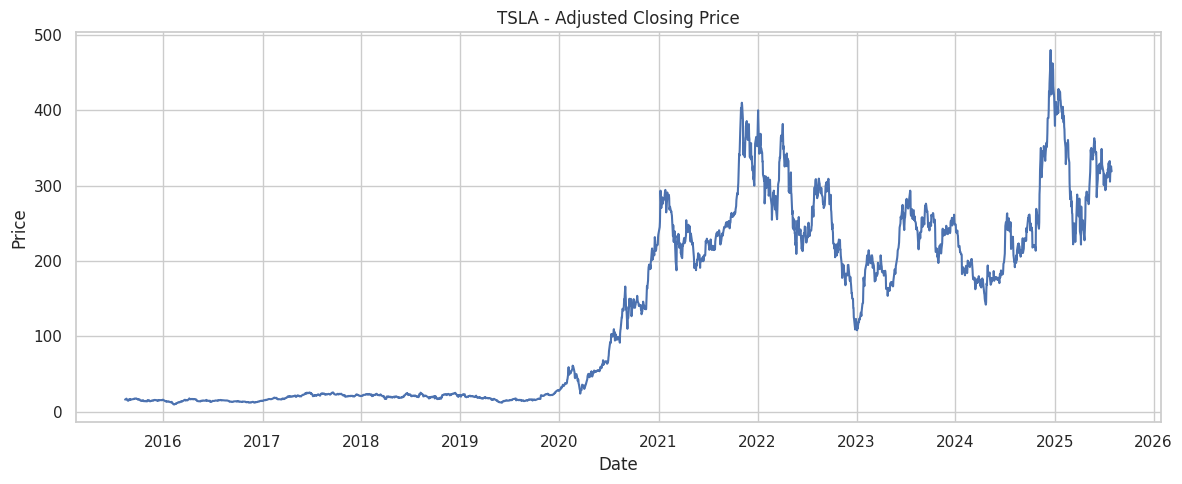

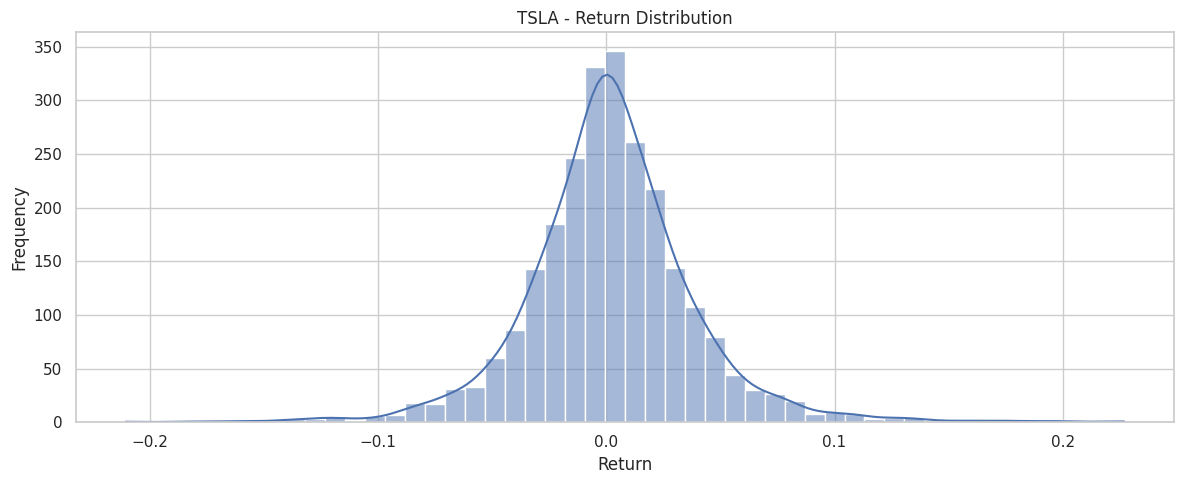

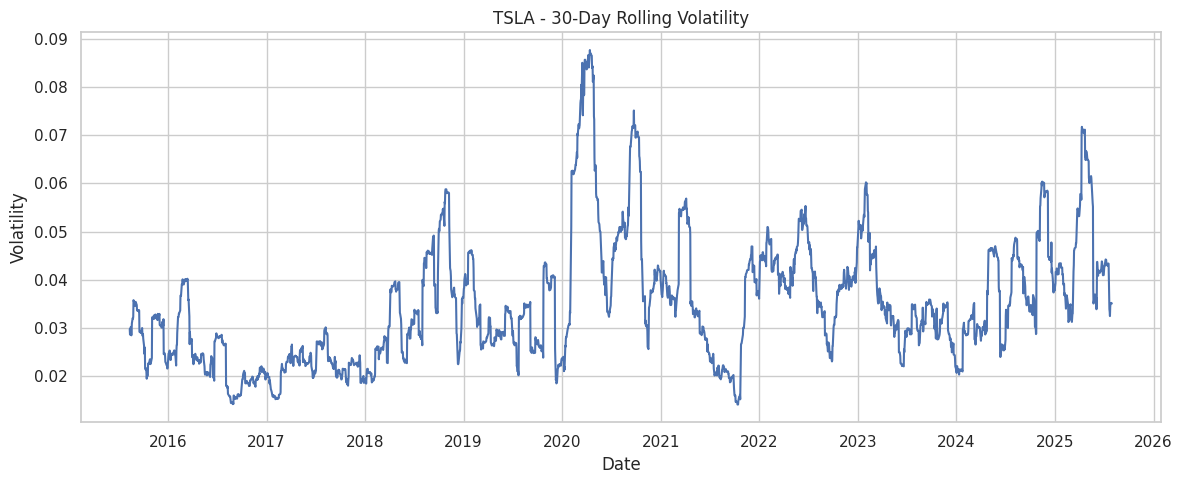

EDA for SPY:


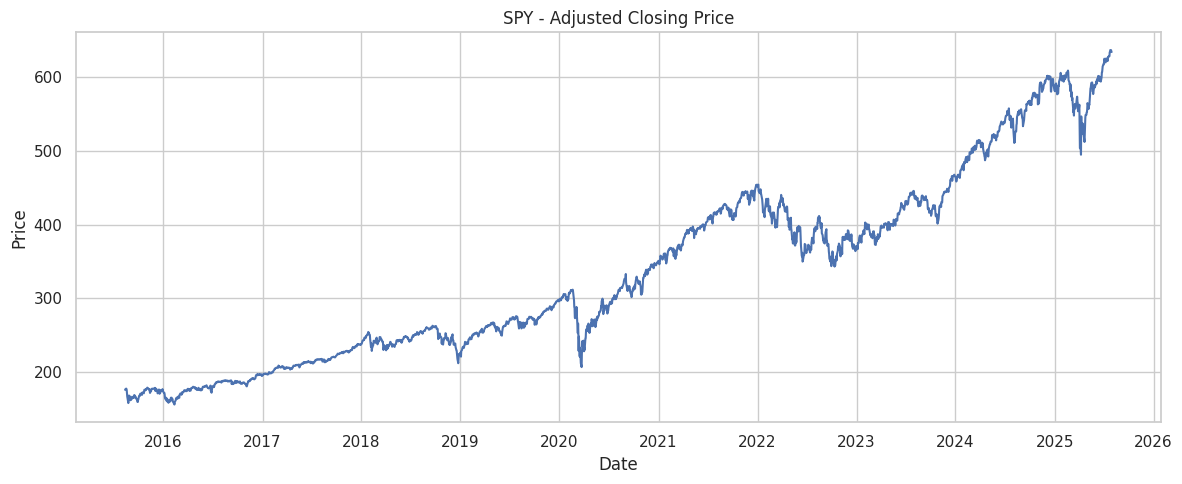

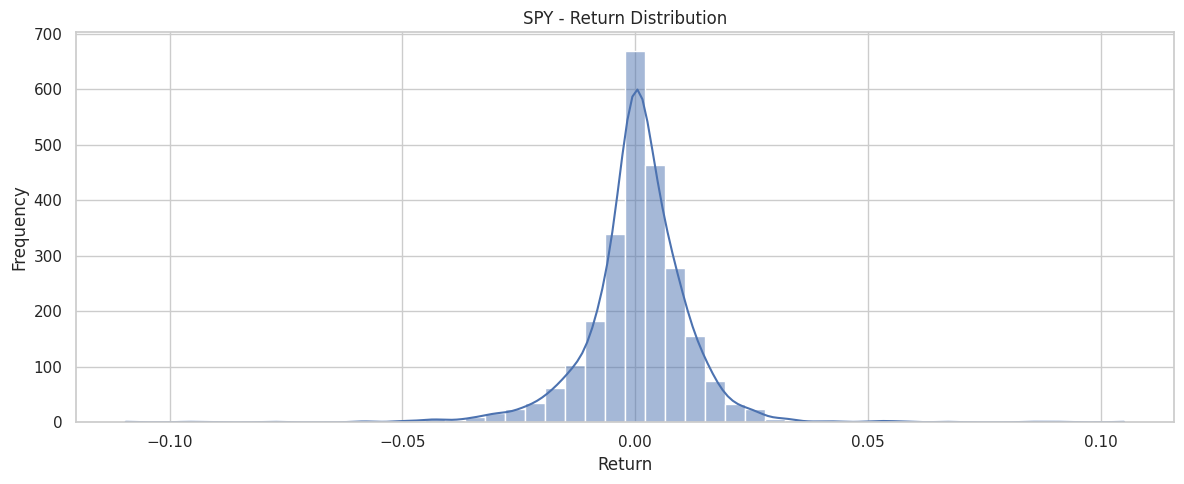

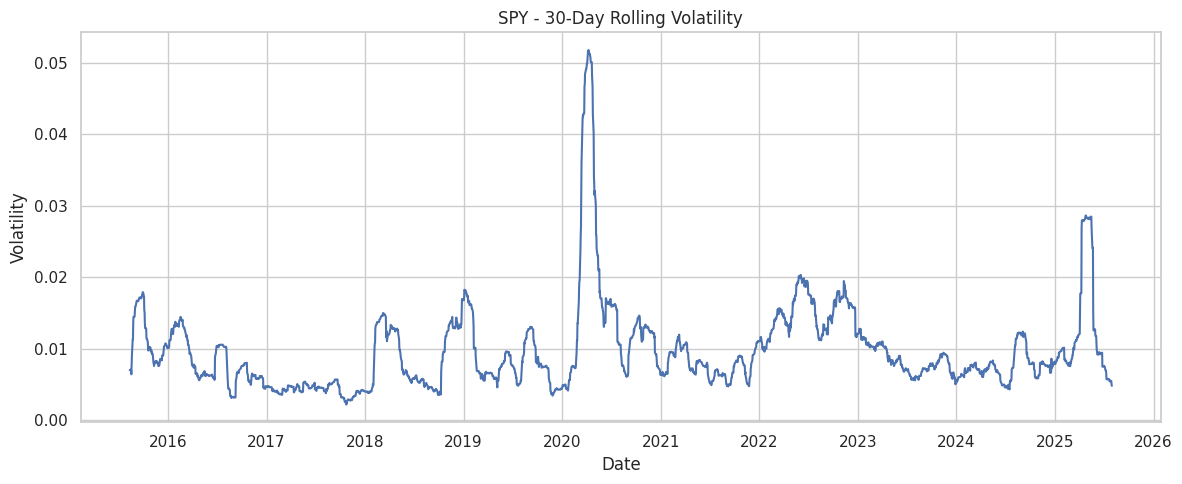

EDA for BND:


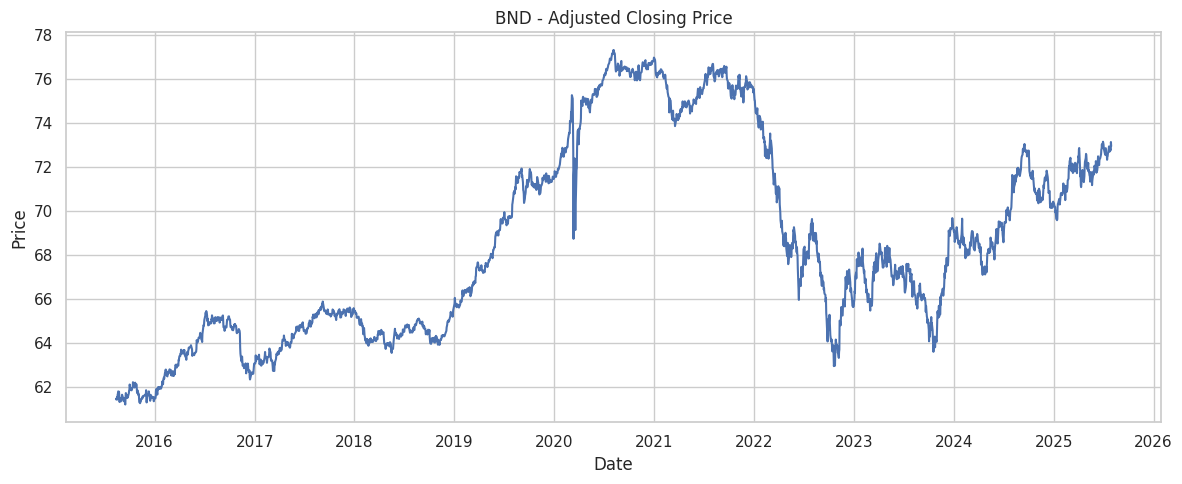

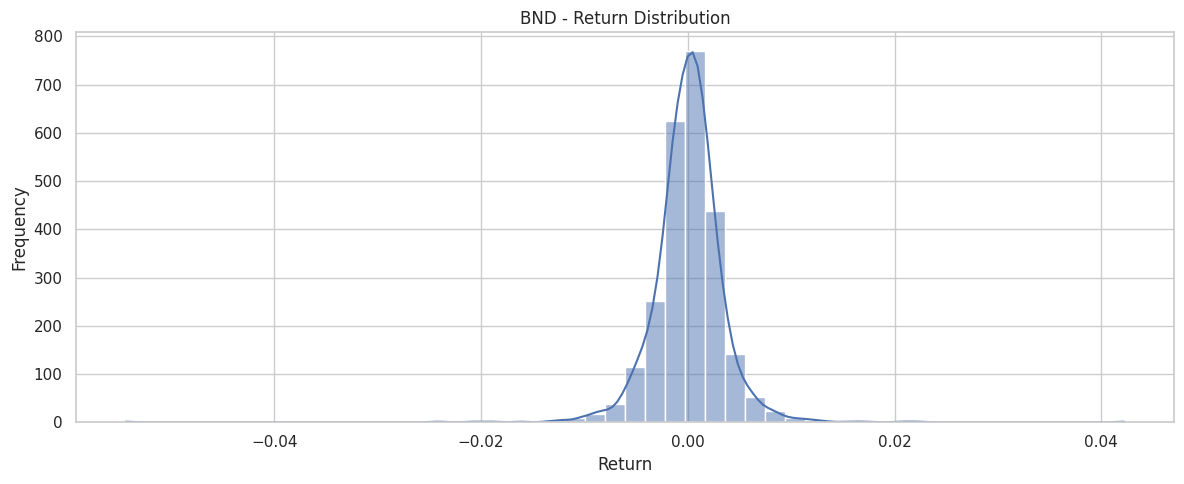

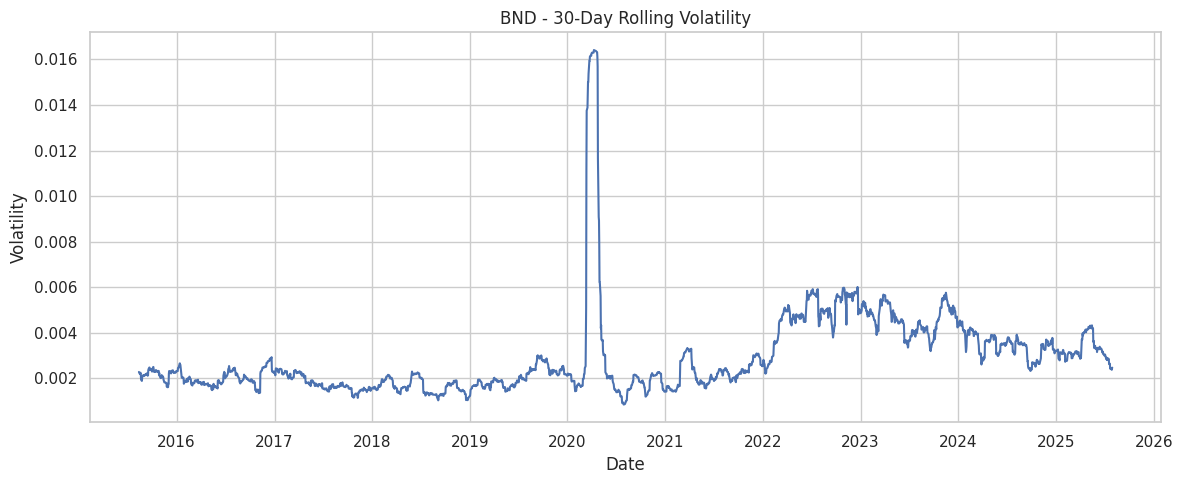

EDA for GC=F:


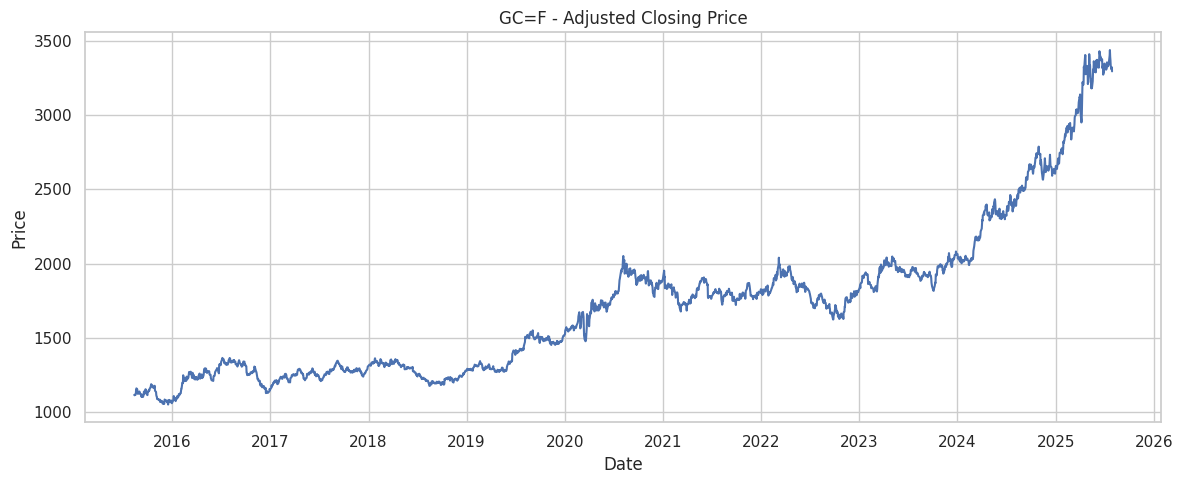

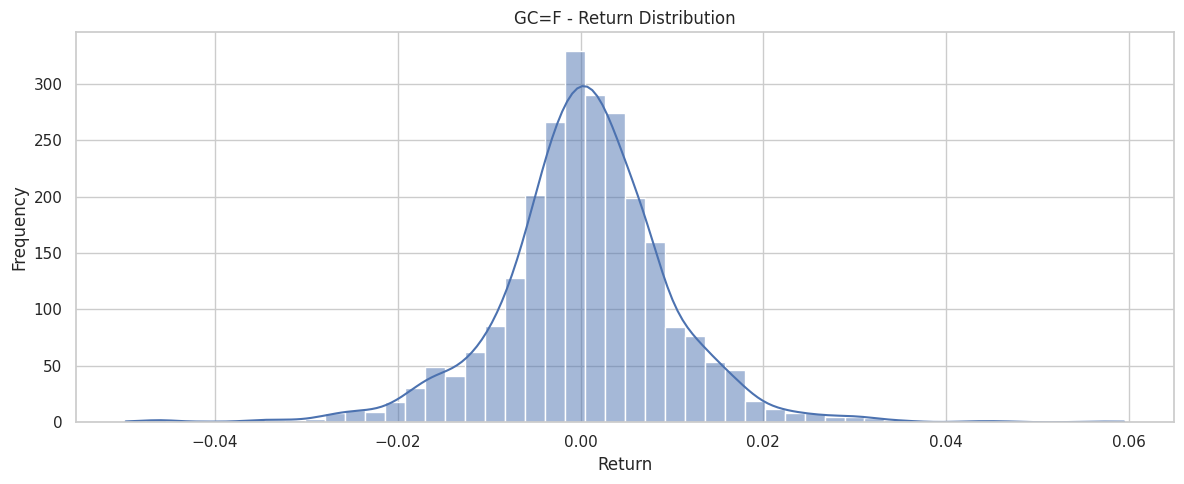

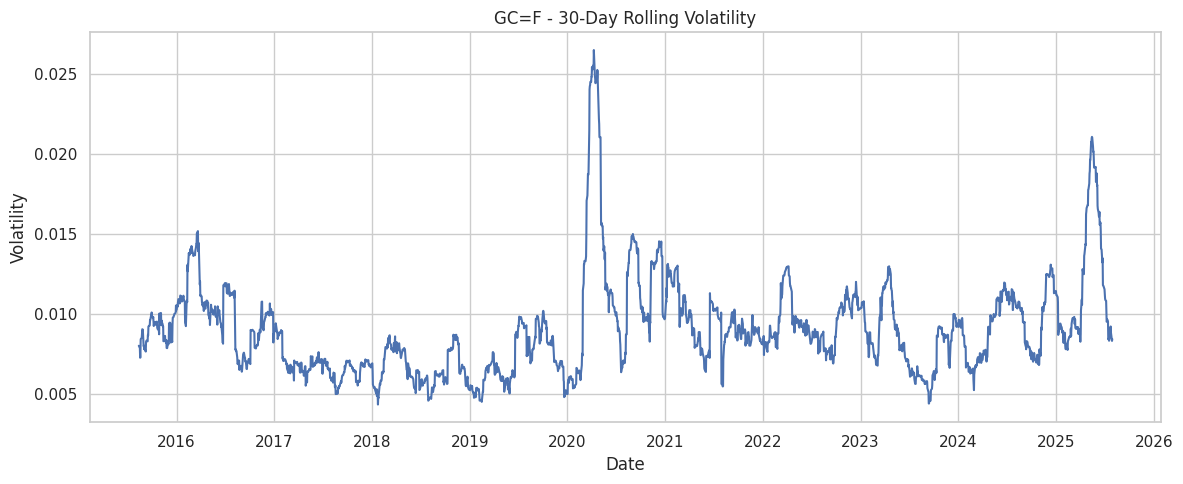

In [10]:
# ## 3. Exploratory Data Analysis (EDA)

# Loop through assets and plot manually
for ticker in ASSETS:
    print(f"EDA for {ticker}:")
    df = load_processed_data(ticker)
    plot_closing_prices(df, ticker)
    plot_returns_distribution(df, ticker)
    plot_rolling_volatility(df, ticker)


In [11]:
### 4. Forecasting with ARIMA and LSTM

forecast_days = 30
forecast_results = {}

for ticker in ASSETS:
    print(f"[INFO] Forecasting {ticker} for next {forecast_days} days...")
    forecast_df = generate_forecasts(ticker, days_ahead=forecast_days)
    forecast_results[ticker] = forecast_df
    display(forecast_df.head())


[INFO] Forecasting TSLA for next 30 days...
Loaded data for TSLA: 2535 rows
Training ARIMA model...
Training LSTM model...


W0000 00:00:1754738974.820325   44850 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,319.040009,321.478180
2025-08-01,319.040009,321.278870
2025-08-04,319.040009,321.207520
2025-08-05,319.040009,321.240845
2025-08-06,319.040009,321.349487


[INFO] Forecasting SPY for next 30 days...
Loaded data for SPY: 2535 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,634.166433,641.839111
2025-08-01,634.902824,643.441956
2025-08-04,634.530763,645.540833
2025-08-05,635.191921,647.794556
2025-08-06,635.019723,650.178284


[INFO] Forecasting BND for next 30 days...
Loaded data for BND: 2535 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,72.921003,73.055756
2025-08-01,72.931635,73.101257
2025-08-04,72.957086,73.146591
2025-08-05,72.959537,73.190331
2025-08-06,72.940814,73.233398


[INFO] Forecasting GC=F for next 30 days...
Loaded data for GC=F: 2534 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,3273.638744,3364.286377
2025-08-01,3253.405777,3369.932861
2025-08-04,3232.350415,3375.802979
2025-08-05,3216.224789,3382.700684
2025-08-06,3200.622967,3390.499023


In [12]:
# ## 5. Train Models (Optional if training separately)

tickers = ["TSLA", "SPY", "BND", "GC=F"]

arima_models = {}
lstm_models = {}

for ticker in tickers:
    print(f"\nTraining models for {ticker}...")
    df = load_processed_data(ticker)
    series = df["Adj Close"]

    # ARIMA Training
    arima_model, arima_rmse = train_arima(series)
    arima_models[ticker] = arima_model
    print(f"{ticker} ARIMA RMSE: {arima_rmse:.2f}")

    # LSTM Training
    lstm_model, scaler, X, y = train_lstm(series)
    lstm_models[ticker] = {
        "model": lstm_model,
        "scaler": scaler,
        "X": X,
        "y": y
    }
    print(f"{ticker} LSTM model trained.")



Training models for TSLA...
TSLA ARIMA RMSE: 69.85
Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0150
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5442e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.8642e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.2760e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.0459e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.3216e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.6660e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.8321e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.0550e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.8607e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.5707e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms

In [13]:
import joblib
assets = ["TSLA", "SPY", "BND", "GC=F"]

for asset in assets:
    data = load_processed_data(asset)["Adj Close"]
    
    # Train ARIMA
    joblib.dump(arima_model, f"../models/arima_{asset}.pkl")

    # Train LSTM
    lstm_model.save(f"../models/lstm_{asset}.h5")
    joblib.dump(scaler, f"../models/lstm_scaler_{asset}.pkl")


In [14]:
# ## 6. Portfolio Optimization

# Prepare historical price data dictionary
price_dfs = {}
for ticker in ASSETS:
    df = load_processed_data(ticker)
    price_dfs[ticker] = df

print("[INFO] Optimizing portfolio weights...")
weights_dict, (exp_return, volatility, sharpe) = optimize_portfolio(price_dfs)

print("Optimal portfolio weights:")
for ticker, weight in weights_dict.items():
    print(f"{ticker}: {weight:.4f}")

print(f"\n[INFO] Portfolio Performance Metrics:")
print(f"Expected Return: {exp_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")



[INFO] Optimizing portfolio weights...
Expected annual return: 13.2%
Annual volatility: 11.8%
Sharpe Ratio: 1.12
Optimal portfolio weights:
TSLA: 0.0519
SPY: 0.3402
BND: 0.0731
GC=F: 0.5348

[INFO] Portfolio Performance Metrics:
Expected Return: 0.1322
Volatility: 0.1176
Sharpe Ratio: 1.1239


In [15]:
import pandas as pd

# Save weights to CSV
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index', columns=['Weight'])
weights_df.to_csv('../data/weights/optimal_weights.csv')

# Save portfolio metrics
metrics = {
    "Expected Return": exp_return,
    "Volatility": volatility,
    "Sharpe Ratio": sharpe
}
metrics_df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
metrics_df.to_csv('../data/weights/portfolio_metrics.csv', index=False)

print("[INFO] Saved optimal weights and metrics to CSV.")


[INFO] Saved optimal weights and metrics to CSV.


Expected annual return: 13.2%
Annual volatility: 11.8%
Sharpe Ratio: 1.12
[INFO] Running backtest from 2015-07-01 to 2025-07-31...


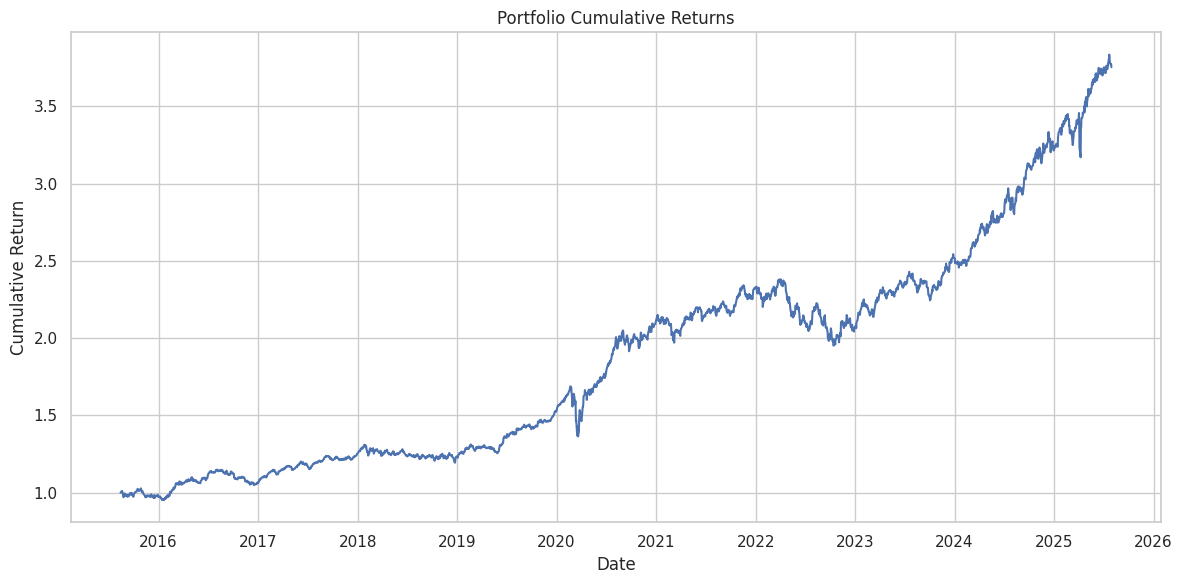


[INFO] Portfolio Weights:
  Asset   Weight
0  TSLA  0.05193
1   SPY  0.34024
2   BND  0.07305
3  GC=F  0.53478

[INFO] Portfolio Performance:
Expected Return: 13.22%
Volatility: 11.76%
Sharpe Ratio: 1.124


In [16]:
# ## 7. Backtesting Portfolio Strategy

#  Unpack weights and portfolio stats correctly
weights, (port_return, port_volatility, port_sharpe) = optimize_portfolio(price_dfs)

start_backtest = START_DATE
end_backtest = END_DATE

print(f"[INFO] Running backtest from {start_backtest} to {end_backtest}...")
cumulative_returns = simulate_portfolio(price_dfs, weights, start_backtest, end_backtest)

#  Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values)
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Print and save weights to CSV
import pandas as pd

weights_df = pd.DataFrame(list(weights.items()), columns=["Asset", "Weight"])
weights_df.to_csv("../data/cumulative/portfolio_weights.csv", index=False)
print("\n[INFO] Portfolio Weights:")
print(weights_df)

#  Save cumulative returns to CSV
cumulative_returns_df = cumulative_returns.reset_index()
cumulative_returns_df.columns = ["Date", "Cumulative_Return"]
cumulative_returns_df.to_csv("../data/cumulative/portfolio_cumulative_returns.csv", index=False)

#  Print portfolio stats
print(f"\n[INFO] Portfolio Performance:")
print(f"Expected Return: {port_return:.2%}")
print(f"Volatility: {port_volatility:.2%}")
print(f"Sharpe Ratio: {port_sharpe:.3f}")


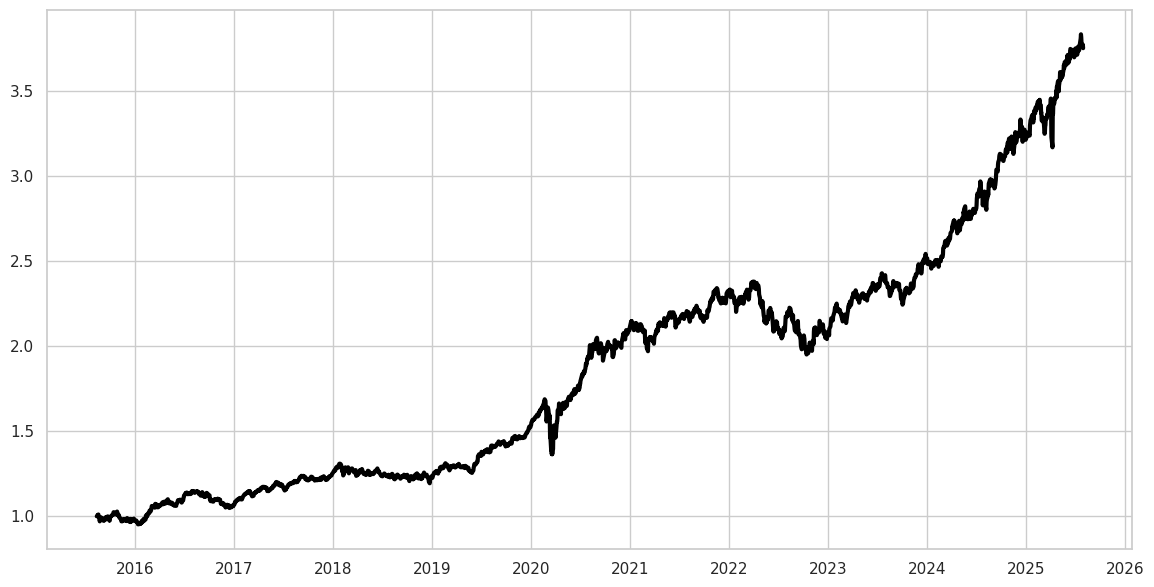

In [17]:
import matplotlib.dates as mdates

# 1. Plot individual asset cumulative returns vs portfolio cumulative returns
plt.figure(figsize=(14, 7))

# Plot portfolio cumulative returns
plt.plot(cumulative_returns.index, cumulative_returns.values, label="Portfolio", linewidth=3, color="black")


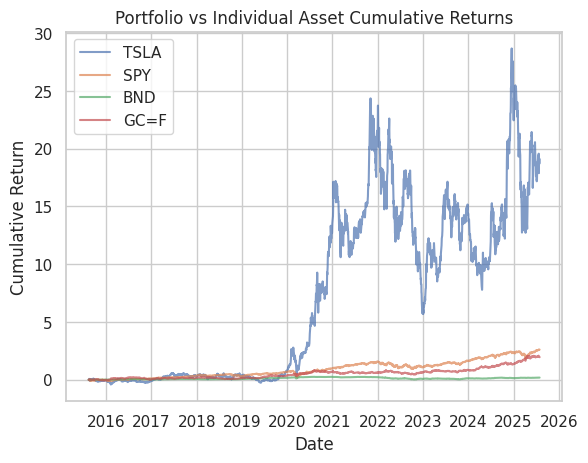

In [18]:
# Plot each asset cumulative returns
for ticker, df in price_dfs.items():
    # Calculate asset daily returns and then cumulative returns
    asset_returns = df.set_index("Date")[ "Adj Close"].pct_change().dropna()
    asset_cum_returns = (1 + asset_returns).cumprod() - 1
    plt.plot(asset_cum_returns.index, asset_cum_returns.values, label=ticker, alpha=0.7)

plt.title("Portfolio vs Individual Asset Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

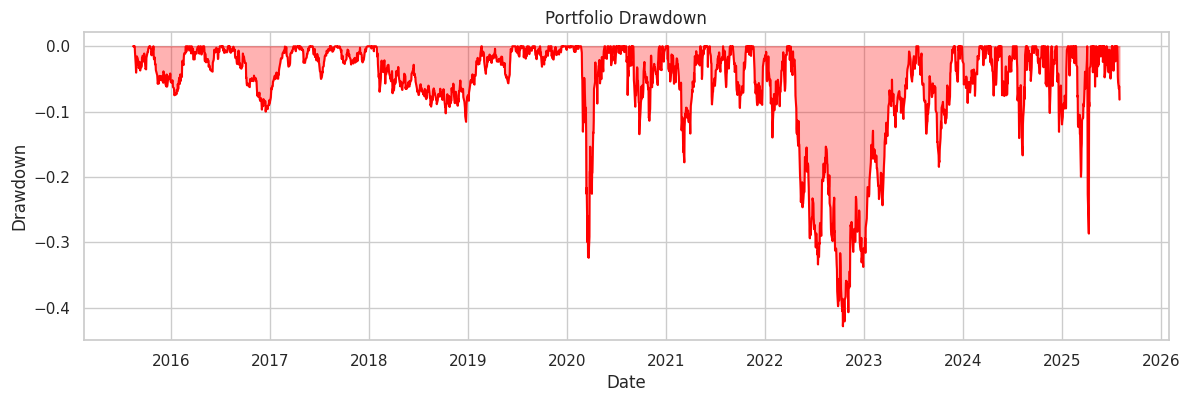

In [19]:
# 2. Calculate and plot drawdowns for portfolio
def calculate_drawdown(cum_returns):
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max)
    return drawdown
portfolio_drawdown = calculate_drawdown(cumulative_returns)

plt.figure(figsize=(14, 4))
plt.plot(portfolio_drawdown.index, portfolio_drawdown.values, color="red")
plt.fill_between(portfolio_drawdown.index, portfolio_drawdown.values, 0, color="red", alpha=0.3)
plt.title("Portfolio Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

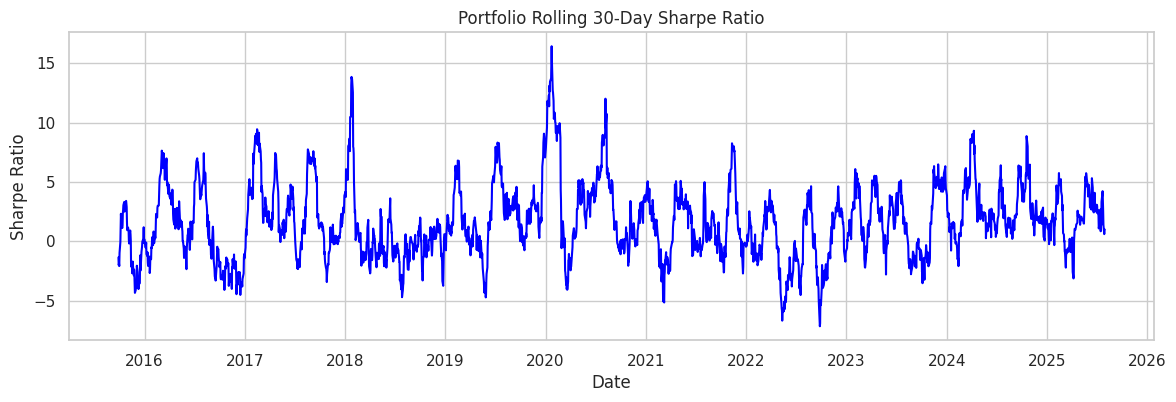

In [20]:
# 3. Rolling Sharpe ratio for portfolio (using 30-day rolling window)
# Assume risk free rate ~0 for simplicity, or set your own risk free rate if available
rolling_window = 30

portfolio_daily_returns = cumulative_returns.pct_change().dropna()
rolling_sharpe = (
    portfolio_daily_returns.rolling(rolling_window).mean() / portfolio_daily_returns.rolling(rolling_window).std()
) * np.sqrt(252)  # annualize assuming 252 trading days

plt.figure(figsize=(14, 4))
plt.plot(rolling_sharpe.index, rolling_sharpe.values, color="blue")
plt.title(f"Portfolio Rolling {rolling_window}-Day Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.grid(True)
plt.show()

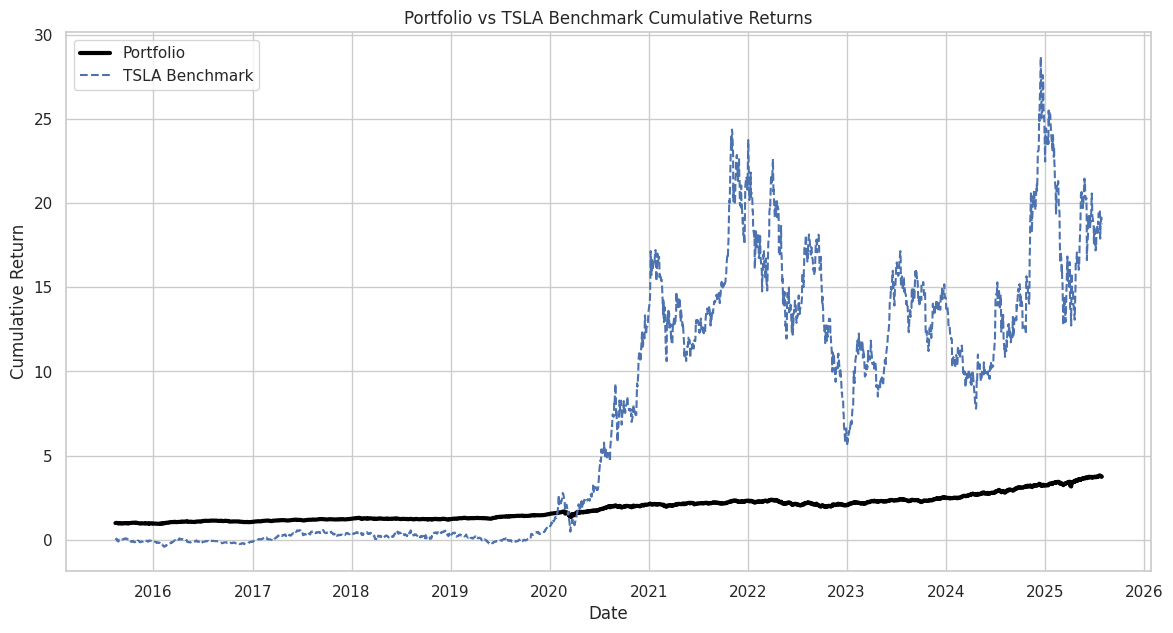

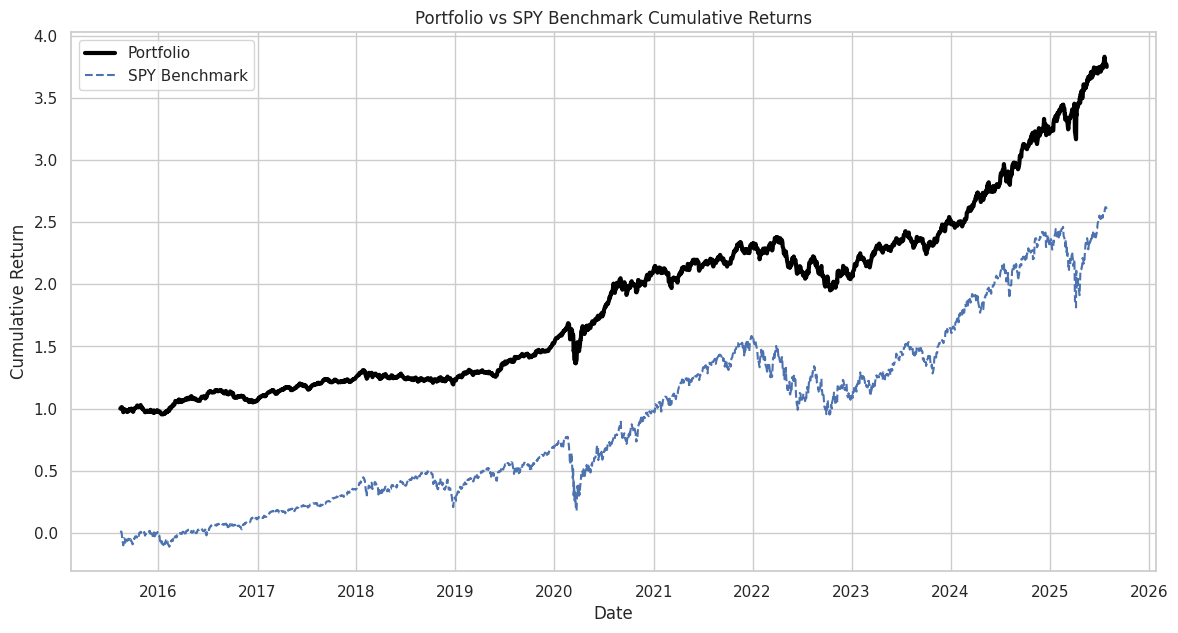

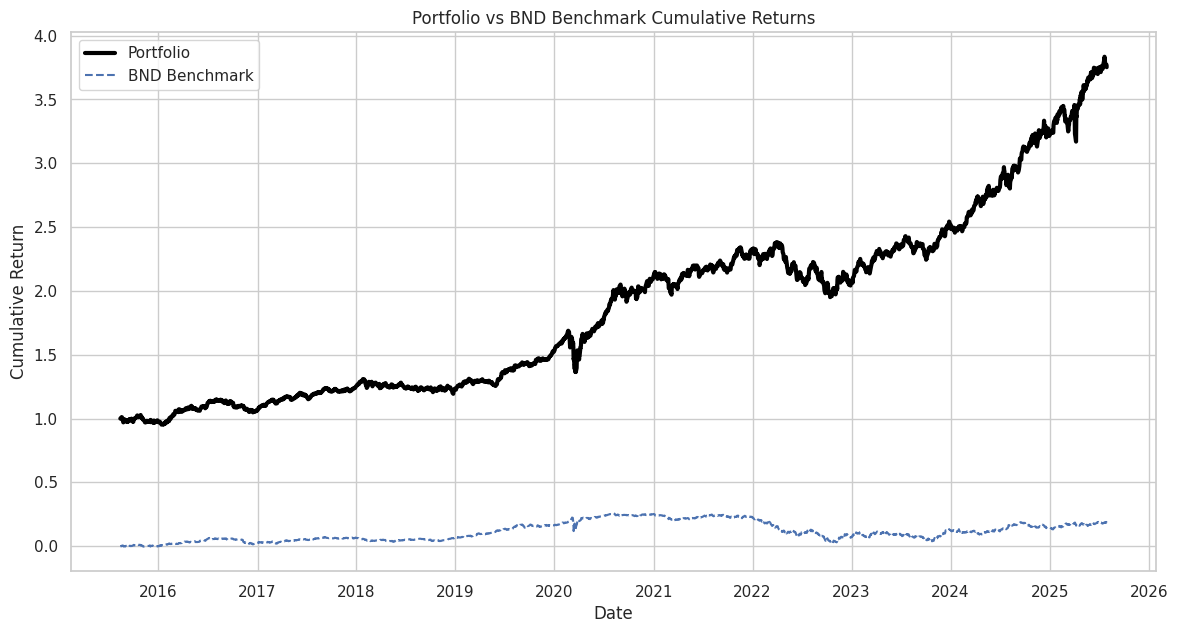

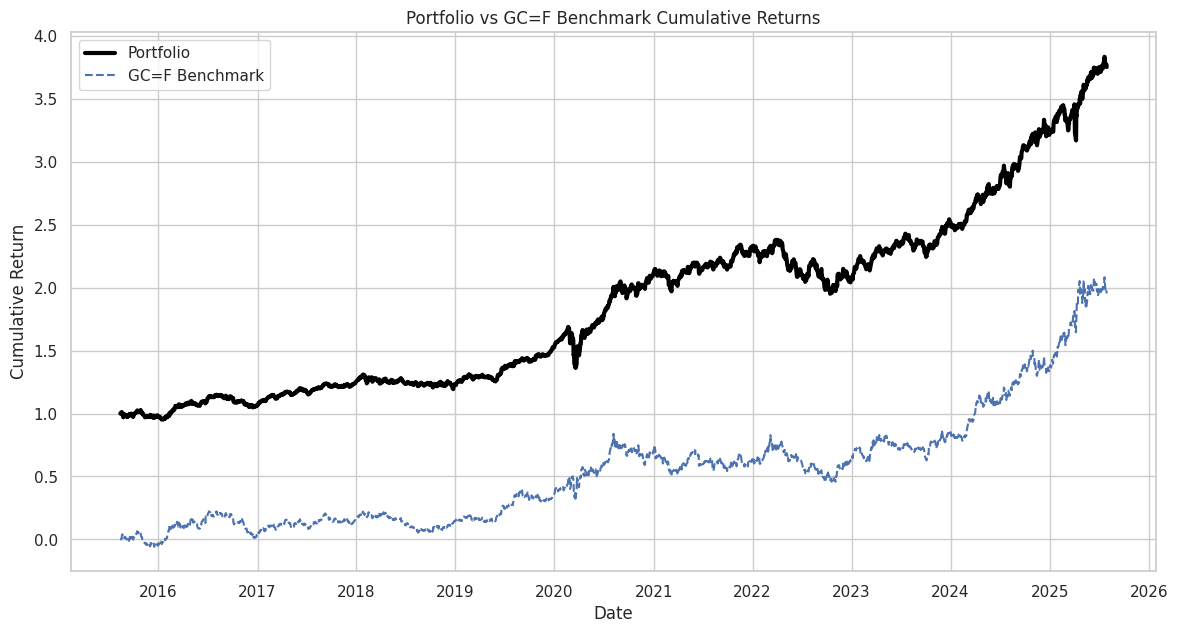

In [21]:
# 4. Compare portfolio cumulative returns against benchmark ( SPY)
for ticker, df in price_dfs.items():
    # Calculate benchmark returns
    benchmark_returns = df.set_index("Date")["Adj Close"].pct_change().dropna()
    benchmark_cum_returns = (1 + benchmark_returns).cumprod() - 1

    # Plot comparison
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns.index, cumulative_returns.values, label="Portfolio", linewidth=3, color="black")
    plt.plot(benchmark_cum_returns.index, benchmark_cum_returns.values, label=f"{ticker} Benchmark", linestyle="--")
    plt.title(f"Portfolio vs {ticker} Benchmark Cumulative Returns")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.show()
